# Notebook 1: Exploration des données 

**Auteurs:**  

Akram Farihi, Sami Abloui, Amalya Mourih 

**Jeu de données utilisé:**

Nous avons choisi le *GlobalCoffeeHealth dataset*, qui contient 10 000 enregistrements reflétant des comportements réels de consommation de café, de sommeil et de santé dans 20 pays.  
Ce jeu de données comprend :
- des variables démographiques (âge, genre, pays, occupation),
- la consommation quotidienne de café et de caféine,
- la durée et la qualité du sommeil,
- l’IMC, la fréquence cardiaque, le niveau de stress,
- l’activité physique, les problèmes de santé, le tabagisme et la consommation d’alcool.

**Objectifs de notebook:**

Dans ce notebook, nous réalisons l’exploration ce jeux des données. 
L’objectif est de comprendre la structure des données, identifier les variables pertinentes et observer les relations entre les attributs.


In [ ]:
# import libraries 

from sys import path

path.append('..')

from src.data.data_loader import load_data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline
print("Les bibliothèques sont importées avec succès.")

Les bibliothèques sont importées avec succès.


## 1. Téléchargement des données brutes

Pour ce projet, nous avons utilisé un jeu de données intitulé "Global Coffee Health Dataset" provenant de la plateforme Kaggle (disponible à l'adresse suivante : https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset). Ce jeu de données a été validé par notre professeur et, malgré sa taille relativement modeste (seulement 16 colonnes), il contient les enregistrements nécessaires et pertinents pour traiter la problématique de notre projet. 

In [ ]:
df = load_data()
print("Données chargées avec succès.")
print("La taille de df est :", df.shape)

Données chargées avec succès.
La taille de df est : (10000, 16)


## 2. Informations générales sur jeux des donées

In [3]:
print("L'aperçu des données :")
df.head()

L'aperçu des données :


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [4]:
print(f"\nInformation sur les données:\n{df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [5]:
print(f"\nValeurs manquants:\n{df.isnull().sum()}")


Valeurs manquants:
ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64


Nous constatons que presque aucune colonne ne possède pas des valeurs manquantes, à part Heallth_Issues que nous gérons dans la partie de prétraitement des données.

## 3. Exploration univariée : variables numériques

Dans cette partie, nous analysons les principales métriques des variables numériques à l’aide des statistiques, de graphiques et de boxplots afin de mieux comprendre la distribution et les caractéristiques de nos données.


In [6]:
# Statistiques pour variables numériques spécifiques
numeric_cols = ['Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 
            'BMI', 'Heart_Rate', 'Physical_Activity_Hours', 'Smoking', 'Alcohol_Consumption']

for var in numeric_cols:
    print(f"\n{var}:")
    print(f"  Mean: {df[var].mean():.2f}")
    print(f"  Mediane: {df[var].median():.2f}")
    print(f"  Écart-type: {df[var].std():.2f}")
    print(f"  Min: {df[var].min():.2f} | Max: {df[var].max():.2f}")


Age:
  Mean: 34.95
  Mediane: 34.00
  Écart-type: 11.16
  Min: 18.00 | Max: 80.00

Coffee_Intake:
  Mean: 2.51
  Mediane: 2.50
  Écart-type: 1.45
  Min: 0.00 | Max: 8.20

Caffeine_mg:
  Mean: 238.41
  Mediane: 235.40
  Écart-type: 137.75
  Min: 0.00 | Max: 780.30

Sleep_Hours:
  Mean: 6.64
  Mediane: 6.60
  Écart-type: 1.22
  Min: 3.00 | Max: 10.00

BMI:
  Mean: 23.99
  Mediane: 24.00
  Écart-type: 3.91
  Min: 15.00 | Max: 38.20

Heart_Rate:
  Mean: 70.62
  Mediane: 71.00
  Écart-type: 9.82
  Min: 50.00 | Max: 109.00

Physical_Activity_Hours:
  Mean: 7.49
  Mediane: 7.50
  Écart-type: 4.32
  Min: 0.00 | Max: 15.00

Smoking:
  Mean: 0.20
  Mediane: 0.00
  Écart-type: 0.40
  Min: 0.00 | Max: 1.00

Alcohol_Consumption:
  Mean: 0.30
  Mediane: 0.00
  Écart-type: 0.46
  Min: 0.00 | Max: 1.00


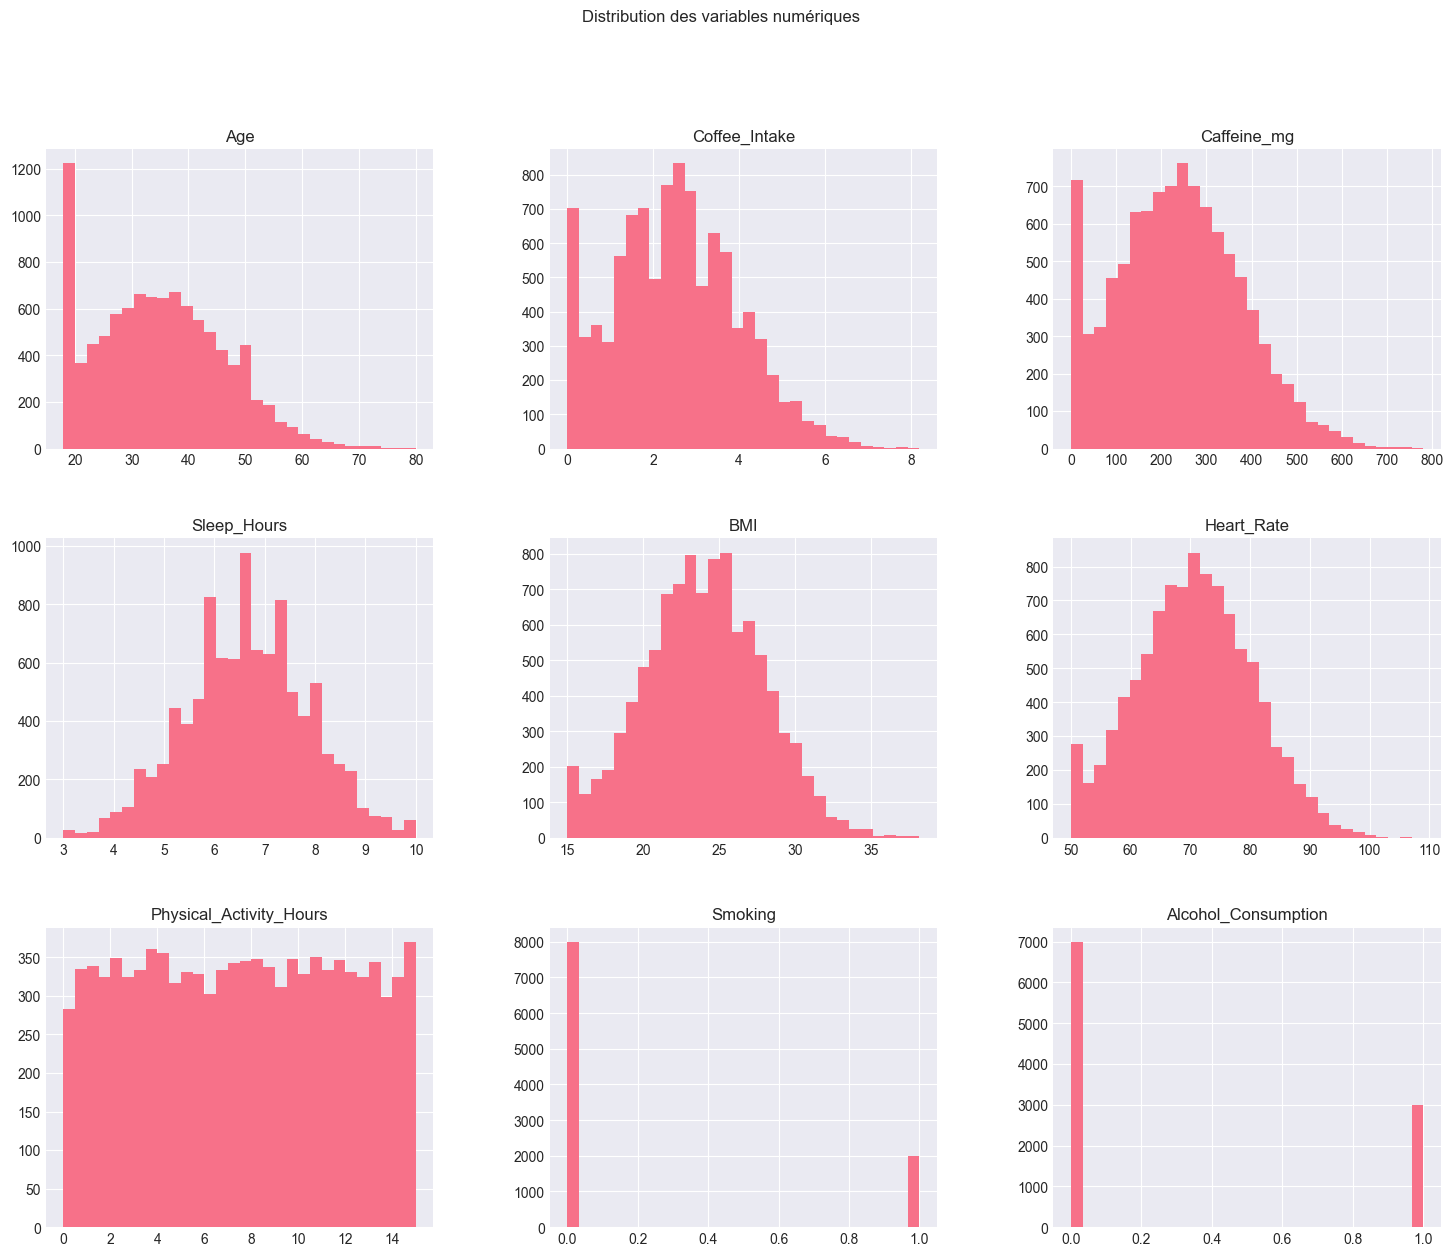

In [7]:

df[numeric_cols].hist(figsize=(18,14), bins=30)
plt.suptitle("Distribution des variables numériques")
plt.show()

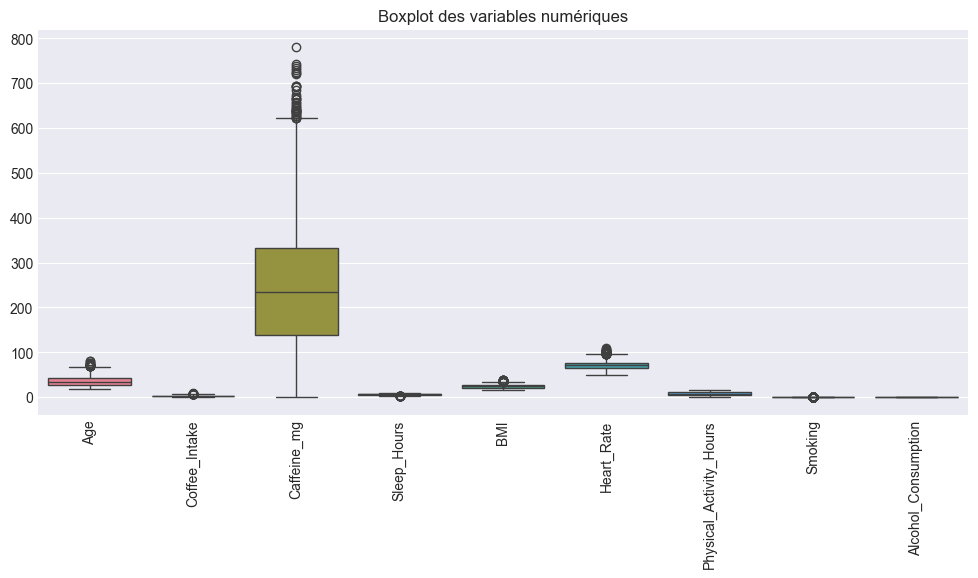

In [8]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot des variables numériques")
plt.show()


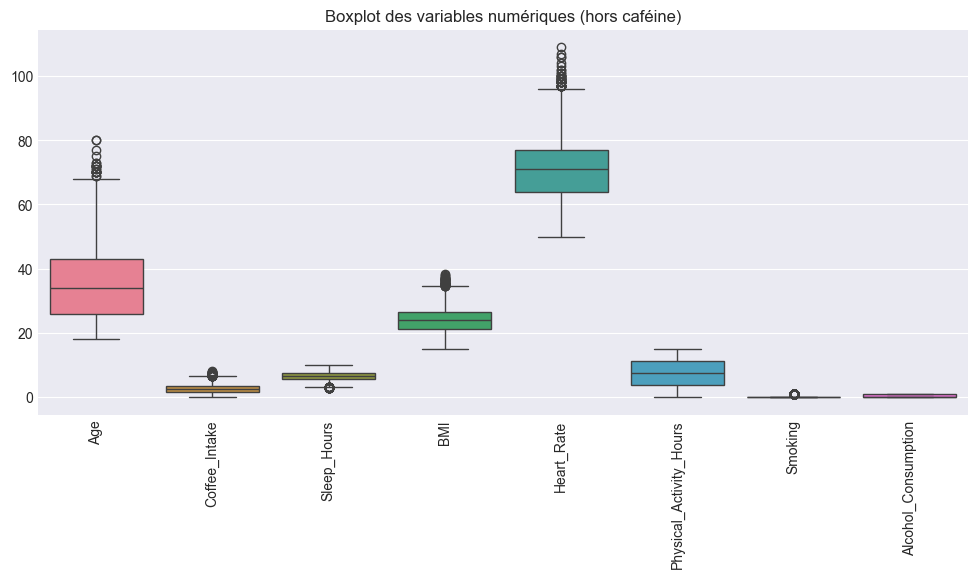

In [9]:
numeric_cols_no_caffeine = [col for col in numeric_cols if col != 'Caffeine_mg']

plt.figure(figsize=(12,5))
sns.boxplot(data=df[numeric_cols_no_caffeine])
plt.xticks(rotation=90)
plt.title("Boxplot des variables numériques (hors caféine)")
plt.show()


La plupart des variables numériques du jeu de données présentent une grande diversité parmi les participants. L’âge moyen est d’environ 35 ans, avec une répartition allant de 18 à 80 ans. La consommation quotidienne de café est en moyenne de 2,5 tasses, mais certains n’en consomment pas du tout tandis que d’autres dépassent 8 tasses. La caféine ingérée varie fortement, avec une moyenne de 238 mg et des valeurs allant jusqu’à 780 mg.

Les heures de sommeil sont centrées autour de 6,6 heures par nuit, ce qui montre une légère tendance à la privation de sommeil chez certains individus. Le BMI moyen est de 24, ce qui correspond à une population globalement normale, mais quelques cas présentent des valeurs élevées. Le rythme cardiaque moyen est de 71 bpm, avec une dispersion notable. 

De plus, il peut être pertinent de ne pas inclure les colonnes "Smoking" et "Alcohol_Consumption" dans cette analyse, car elles ne contiennent que des valeurs binaires.

L’activité physique hebdomadaire est très variable, avec une moyenne de 7,5 heures. Les comportements à risque comme le tabagisme et la consommation d’alcool sont peu fréquents : la majorité des participants ne fument pas (moyenne 0,2) et ne consomment pas d’alcool (moyenne 0,3).

Enfin, les graphiques et boxplots révèlent la présence d’outliers et d’asymétries pour certaines variables, ce qui sera intéressant à rémarquer.


## 4. Exploration univariée : variables catégorielles

Dans cette partie, nous analysons les variables catégorielles en observant leur répartition et leur fréquence au sein du jeu de données.

In [10]:
# Analyse des variables catégorielles

categorical_cols = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 
            'Health_Issues', 'Occupation']


for var in categorical_cols:
    print(f"\n{var}:")
    counts = df[var].value_counts()
    percentages = (counts / len(df)) * 100
    for cat, count in counts.items():
        print(f"  {cat}: {count} ({percentages[cat]:.1f}%)")


Gender:
  Female: 5001 (50.0%)
  Male: 4773 (47.7%)
  Other: 226 (2.3%)

Country:
  Canada: 543 (5.4%)
  India: 524 (5.2%)
  Norway: 523 (5.2%)
  China: 521 (5.2%)
  UK: 519 (5.2%)
  Sweden: 513 (5.1%)
  South Korea: 512 (5.1%)
  Finland: 510 (5.1%)
  Italy: 509 (5.1%)
  Switzerland: 500 (5.0%)
  France: 499 (5.0%)
  Germany: 497 (5.0%)
  Australia: 497 (5.0%)
  Belgium: 497 (5.0%)
  Netherlands: 494 (4.9%)
  Spain: 486 (4.9%)
  Mexico: 483 (4.8%)
  Japan: 469 (4.7%)
  Brazil: 456 (4.6%)
  USA: 448 (4.5%)

Sleep_Quality:
  Good: 5637 (56.4%)
  Fair: 2050 (20.5%)
  Excellent: 1352 (13.5%)
  Poor: 961 (9.6%)

Stress_Level:
  Low: 6989 (69.9%)
  Medium: 2050 (20.5%)
  High: 961 (9.6%)

Health_Issues:
  Mild: 3579 (35.8%)
  Moderate: 463 (4.6%)
  Severe: 17 (0.2%)

Occupation:
  Office: 2073 (20.7%)
  Other: 2038 (20.4%)
  Student: 1968 (19.7%)
  Healthcare: 1964 (19.6%)
  Service: 1957 (19.6%)


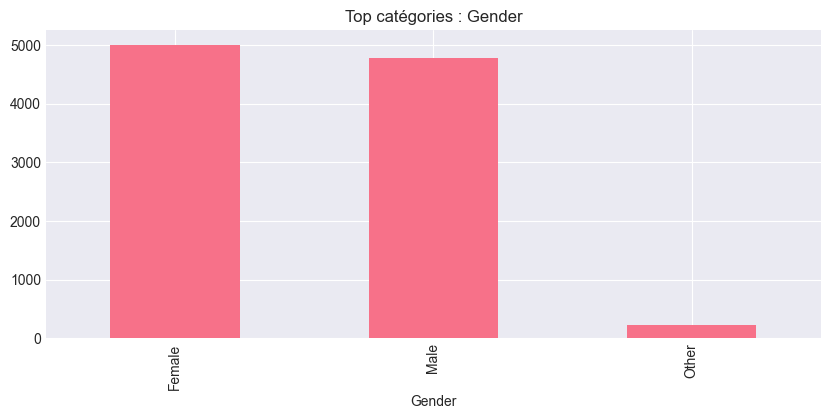

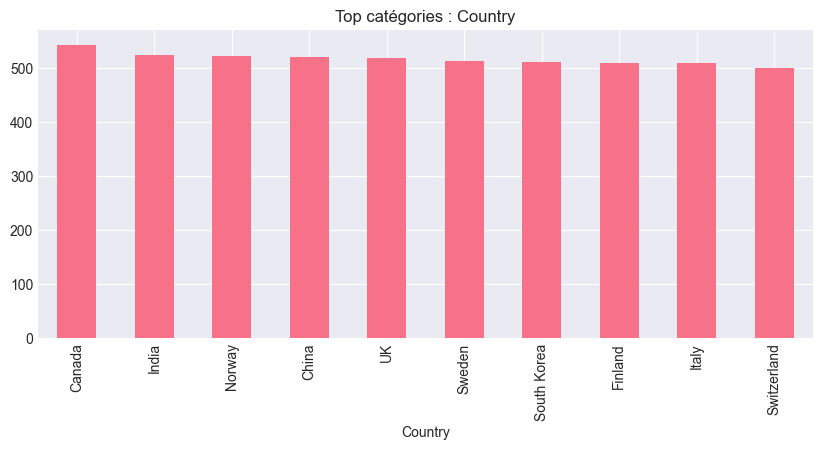

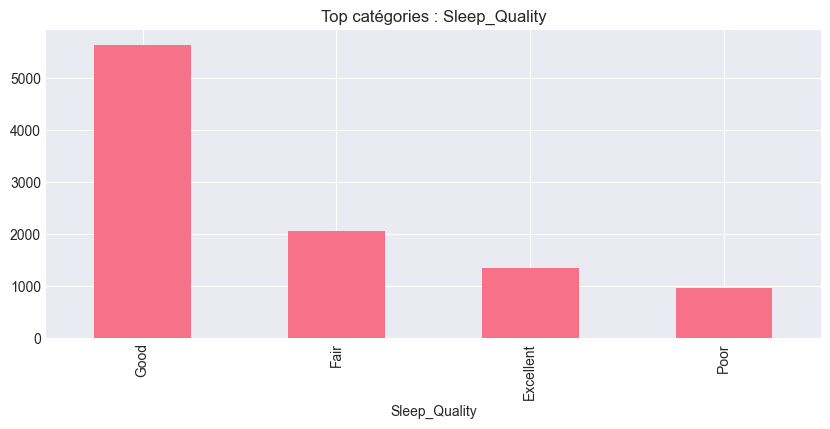

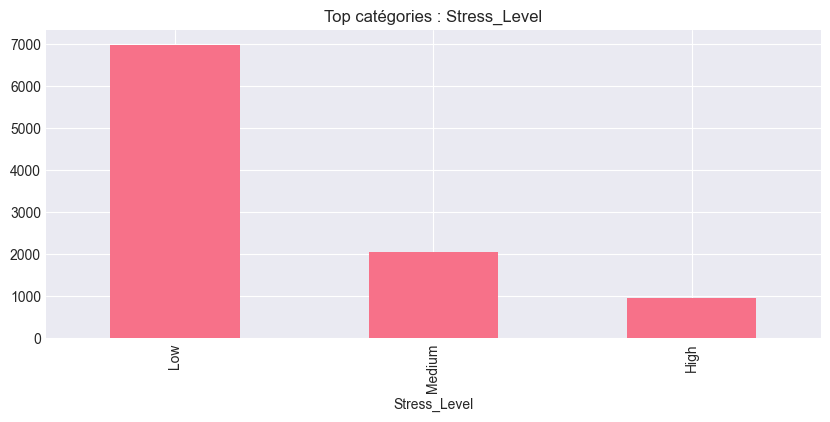

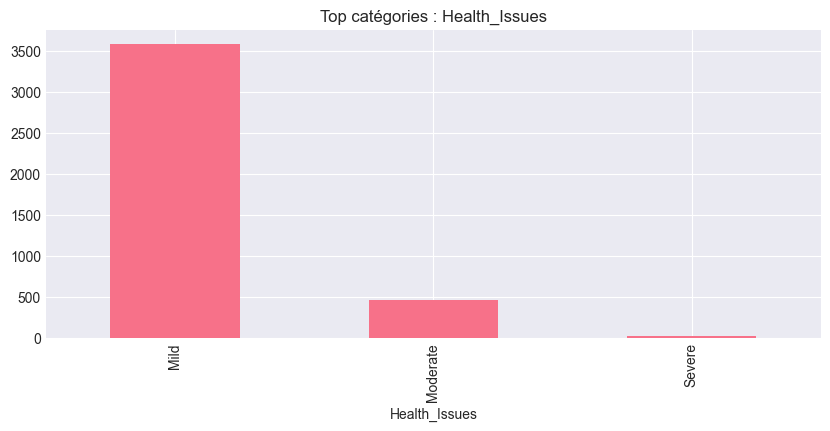

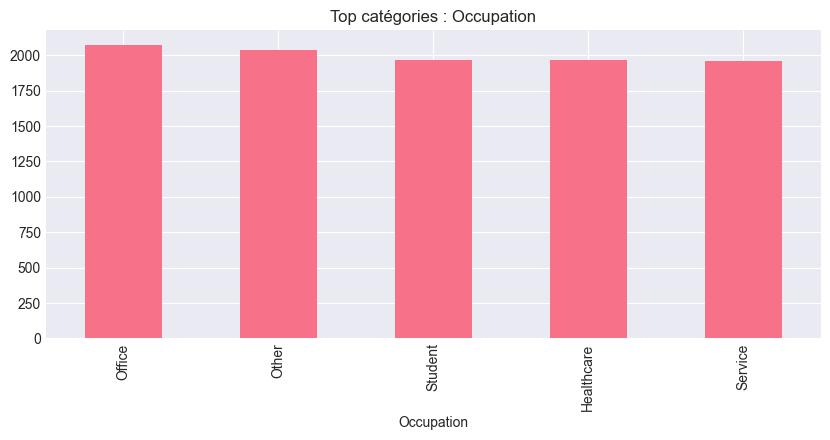

In [11]:

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    df[col].value_counts().head(10).plot(kind="bar")
    plt.title(f"Top catégories : {col}")
    plt.show()



Nous observons une grande diversité au sein du jeu de données. La variable « Gender » est équilibrée entre femmes (50 %) et hommes (47,7 %), avec une faible proportion d’autres genres (2,3 %).

Les participants proviennent de 20 pays différents, chacun représentant environ 4,5 % à 5,4 % de l’échantillon, ce qui garantit une représentativité internationale, comme l’illustrent les graphiques.

Concernant la qualité du sommeil, plus de la moitié des individus déclarent un sommeil « Good » (56,4 %), tandis que les niveaux « Fair », « Excellent » et « Poor » sont moins fréquents. Le niveau de stress est majoritairement « Low » (69,9 %), avec une minorité en « Medium » (20,5 %) ou « High » (9,6 %), ce qui peut entraîner un certain déséquilibre dans les données.

Pour les problèmes de santé, la majorité sont « Mild » (35,8 %), alors que les cas « Moderate » et « Severe » sont rares. Enfin, la variable « Occupation » est bien répartie entre les catégories « Office », « Other », « Student », « Healthcare » et « Service », chacune représentant environ 20 % des participants.

Ces observations confirment la diversité des profils et des situations dans le jeu de données.

## 5. Analyse bivariée et corrélations entre variables

Enfin, nous allons explorer différentes analyses en étudiant les relations entre les variables afin d’observer les principales corrélations présentes dans le jeu de données.

C:\Users\amaly\AppData\Local\Temp\ipykernel_16040\2829555420.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gros_Buveur_Cafe', y='Sleep_Hours', data=df, ax=axes[0, 0], palette='Set2')
C:\Users\amaly\AppData\Local\Temp\ipykernel_16040\2829555420.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gros_Buveur_Cafe', y='BMI', data=df, ax=axes[0, 1], palette='Set3')
C:\Users\amaly\AppData\Local\Temp\ipykernel_16040\2829555420.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sleep_Quality', y='Sleep_Hours', data=df, ax=axes[1,

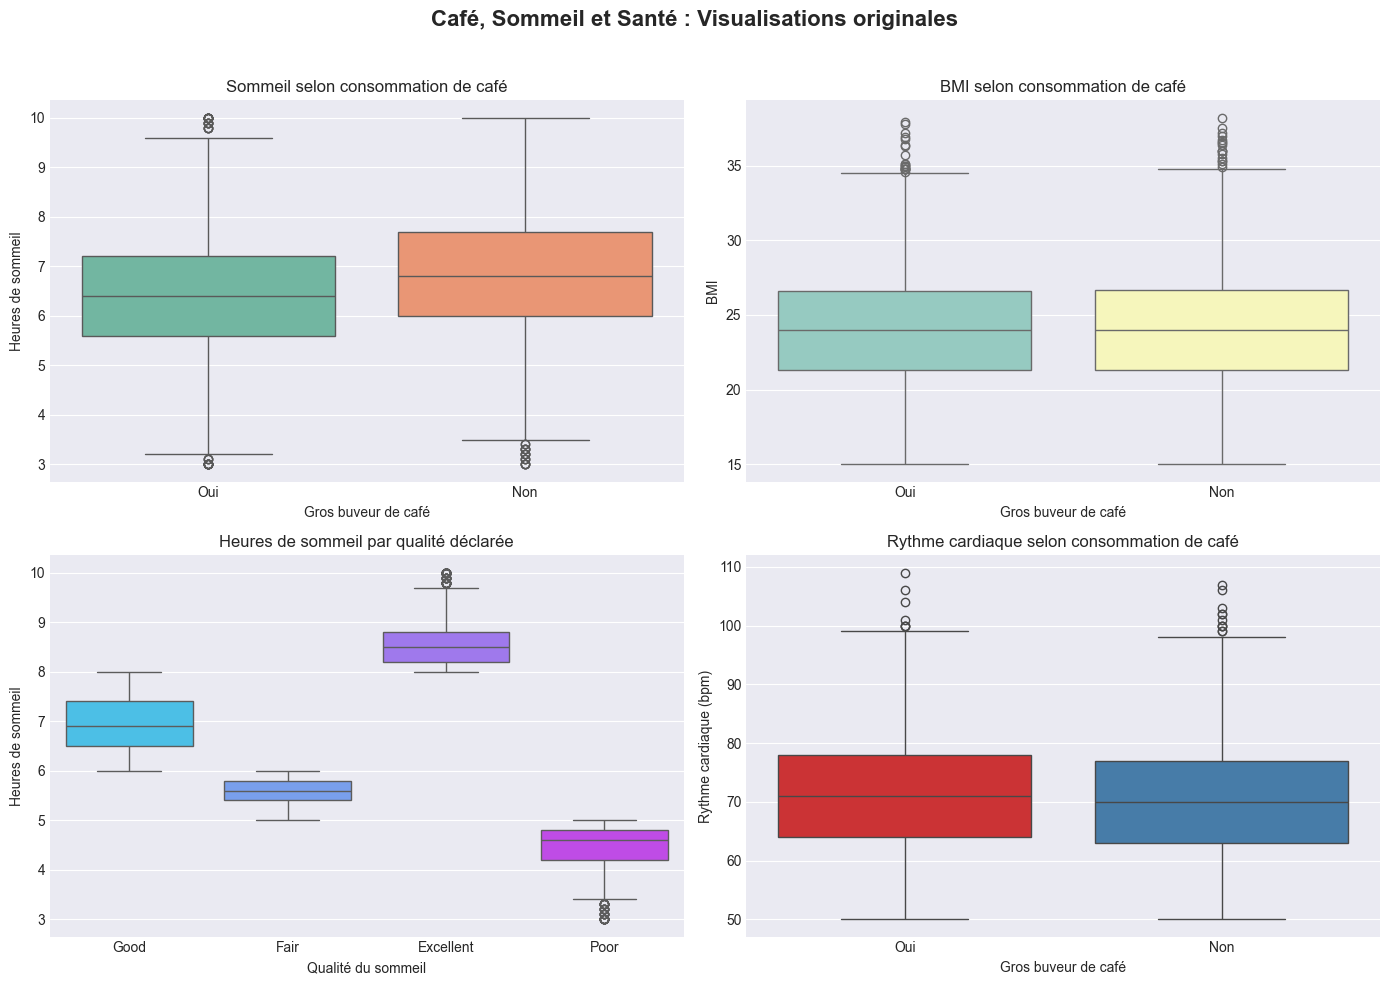

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Création de groupes d'âge pour l'analyse
df['Age_Group'] = pd.cut(df['Age'], bins=[17, 30, 45, 60, 80], labels=['18-30', '31-45', '46-60', '61-80'])

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Café, Sommeil et Santé : Visualisations originales", fontsize=16, fontweight='bold')

# 1. Boxplot : Heures de sommeil selon la consommation de café (binaire)
df['Gros_Buveur_Cafe'] = (df['Coffee_Intake'] > df['Coffee_Intake'].median()).map({True: 'Oui', False: 'Non'})
sns.boxplot(x='Gros_Buveur_Cafe', y='Sleep_Hours', data=df, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title("Sommeil selon consommation de café")
axes[0, 0].set_xlabel("Gros buveur de café")
axes[0, 0].set_ylabel("Heures de sommeil")

# 2. Boxplot : BMI selon la consommation de café
sns.boxplot(x='Gros_Buveur_Cafe', y='BMI', data=df, ax=axes[0, 1], palette='Set3')
axes[0, 1].set_title("BMI selon consommation de café")
axes[0, 1].set_xlabel("Gros buveur de café")
axes[0, 1].set_ylabel("BMI")

# 3. Boxplot : Heures de sommeil selon la qualité du sommeil
sns.boxplot(x='Sleep_Quality', y='Sleep_Hours', data=df, ax=axes[1, 0], palette='cool')
axes[1, 0].set_title("Heures de sommeil par qualité déclarée")
axes[1, 0].set_xlabel("Qualité du sommeil")
axes[1, 0].set_ylabel("Heures de sommeil")

# 4. Boxplot : Rythme cardiaque selon la consommation de café
sns.boxplot(x='Gros_Buveur_Cafe', y='Heart_Rate', data=df, ax=axes[1, 1], palette='Set1')
axes[1, 1].set_title("Rythme cardiaque selon consommation de café")
axes[1, 1].set_xlabel("Gros buveur de café")
axes[1, 1].set_ylabel("Rythme cardiaque (bpm)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

On observe que les gros buveurs de café dorment légèrement moins que les autres, avec une médiane de sommeil un peu plus faible. Cela suggère un possible effet de la consommation élevée de café sur la réduction du temps de repos.

En revanche, ni le BMI ni le rythme cardiaque ne montrent de différences notables entre gros consommateurs et autres individus. Dans ce jeu de données, le café n’apparaît donc pas lié à des variations significatives de ces mesures physiologiques.

Enfin, la qualité de sommeil déclarée correspond bien à la durée réelle : ceux qui rapportent un sommeil « Excellent » dorment davantage, tandis que ceux qui indiquent un sommeil « Poor » dorment moins. Cela confirme la cohérence de la variable « Sleep_Quality ».


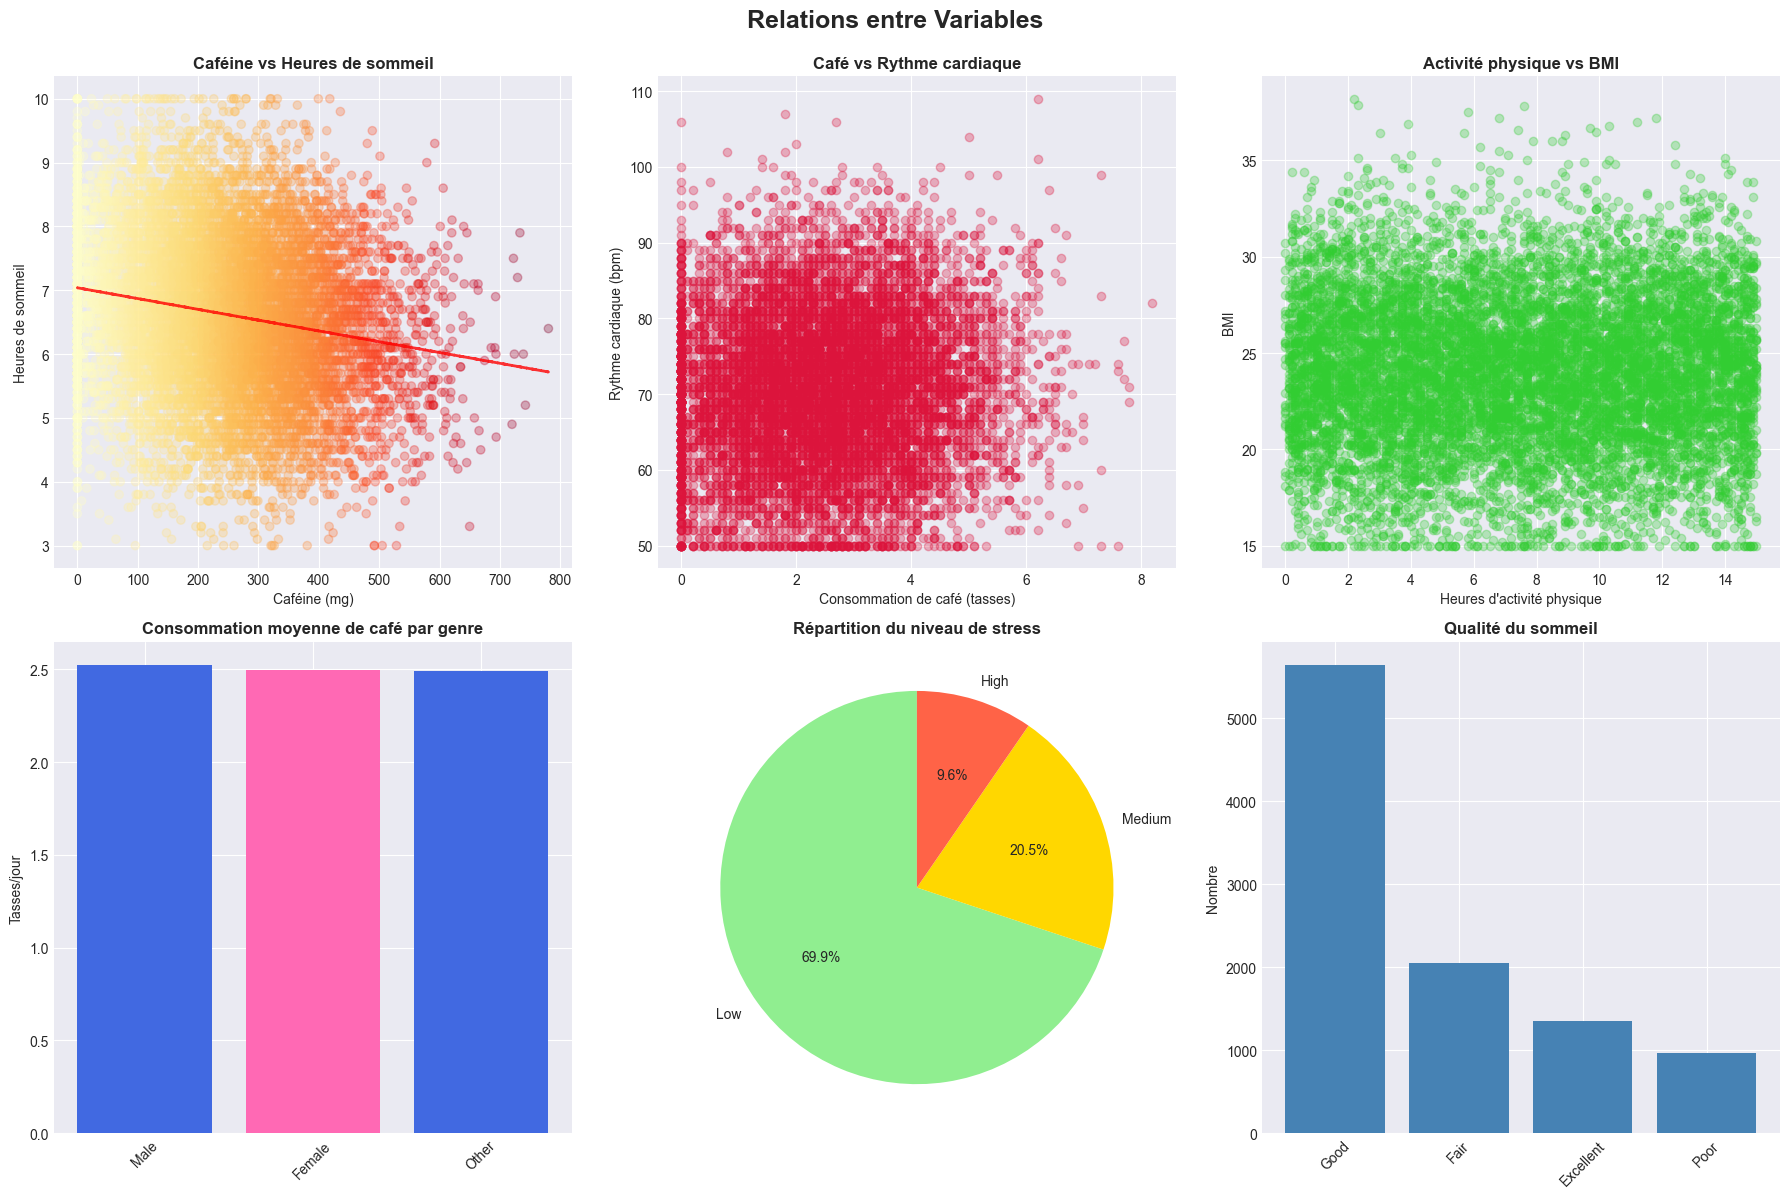

In [13]:
# Figure 2: Relations entre variables
fig2, axes = plt.subplots(2, 3, figsize=(18, 12))
fig2.suptitle('Relations entre Variables', fontsize=18, fontweight='bold', y=0.995)

# Caféine vs Sommeil
axes[0, 0].scatter(df['Caffeine_mg'], df['Sleep_Hours'], alpha=0.3, c=df['Coffee_Intake'], cmap='YlOrRd')
axes[0, 0].set_title('Caféine vs Heures de sommeil', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Caféine (mg)')
axes[0, 0].set_ylabel('Heures de sommeil')
z = np.polyfit(df['Caffeine_mg'], df['Sleep_Hours'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['Caffeine_mg'], p(df['Caffeine_mg']), "r--", alpha=0.8, linewidth=2)

# Café vs Rythme cardiaque
axes[0, 1].scatter(df['Coffee_Intake'], df['Heart_Rate'], alpha=0.3, color='#DC143C')
axes[0, 1].set_title('Café vs Rythme cardiaque', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Consommation de café (tasses)')
axes[0, 1].set_ylabel('Rythme cardiaque (bpm)')

# Activité physique vs BMI
axes[0, 2].scatter(df['Physical_Activity_Hours'], df['BMI'], alpha=0.3, color='#32CD32')
axes[0, 2].set_title('Activité physique vs BMI', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Heures d\'activité physique')
axes[0, 2].set_ylabel('BMI')

# Genre vs Café
gender_coffee = df.groupby('Gender')['Coffee_Intake'].mean().sort_values(ascending=False)
axes[1, 0].bar(range(len(gender_coffee)), gender_coffee.values, color=['#4169E1', '#FF69B4'])
axes[1, 0].set_xticks(range(len(gender_coffee)))
axes[1, 0].set_xticklabels(gender_coffee.index, rotation=45)
axes[1, 0].set_title('Consommation moyenne de café par genre', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Tasses/jour')

# Niveau de stress
stress_counts = df['Stress_Level'].value_counts()
colors_stress = ['#90EE90', '#FFD700', '#FF6347']
axes[1, 1].pie(stress_counts.values, labels=stress_counts.index, autopct='%1.1f%%', 
               startangle=90, colors=colors_stress)
axes[1, 1].set_title('Répartition du niveau de stress', fontsize=12, fontweight='bold')

# Qualité du sommeil
sleep_quality = df['Sleep_Quality'].value_counts()
axes[1, 2].bar(range(len(sleep_quality)), sleep_quality.values, color='#4682B4')
axes[1, 2].set_xticks(range(len(sleep_quality)))
axes[1, 2].set_xticklabels(sleep_quality.index, rotation=45)
axes[1, 2].set_title('Qualité du sommeil', fontsize=12, fontweight='bold')
axes[1, 2].set_ylabel('Nombre')

plt.tight_layout()
plt.show()



Nous observons plusieurs relations entre les variables du jeu de données. On observe notamment une légère tendance négative entre la consommation de caféine et les heures de sommeil, ainsi qu’une dispersion importante entre la consommation de café et le rythme cardiaque. L’activité physique semble peu corrélée au BMI. La consommation moyenne de café varie peu selon le genre. Enfin, la majorité des participants déclarent un faible niveau de stress et une bonne qualité de sommeil, comme le montrent la répartition des catégories correspondantes.

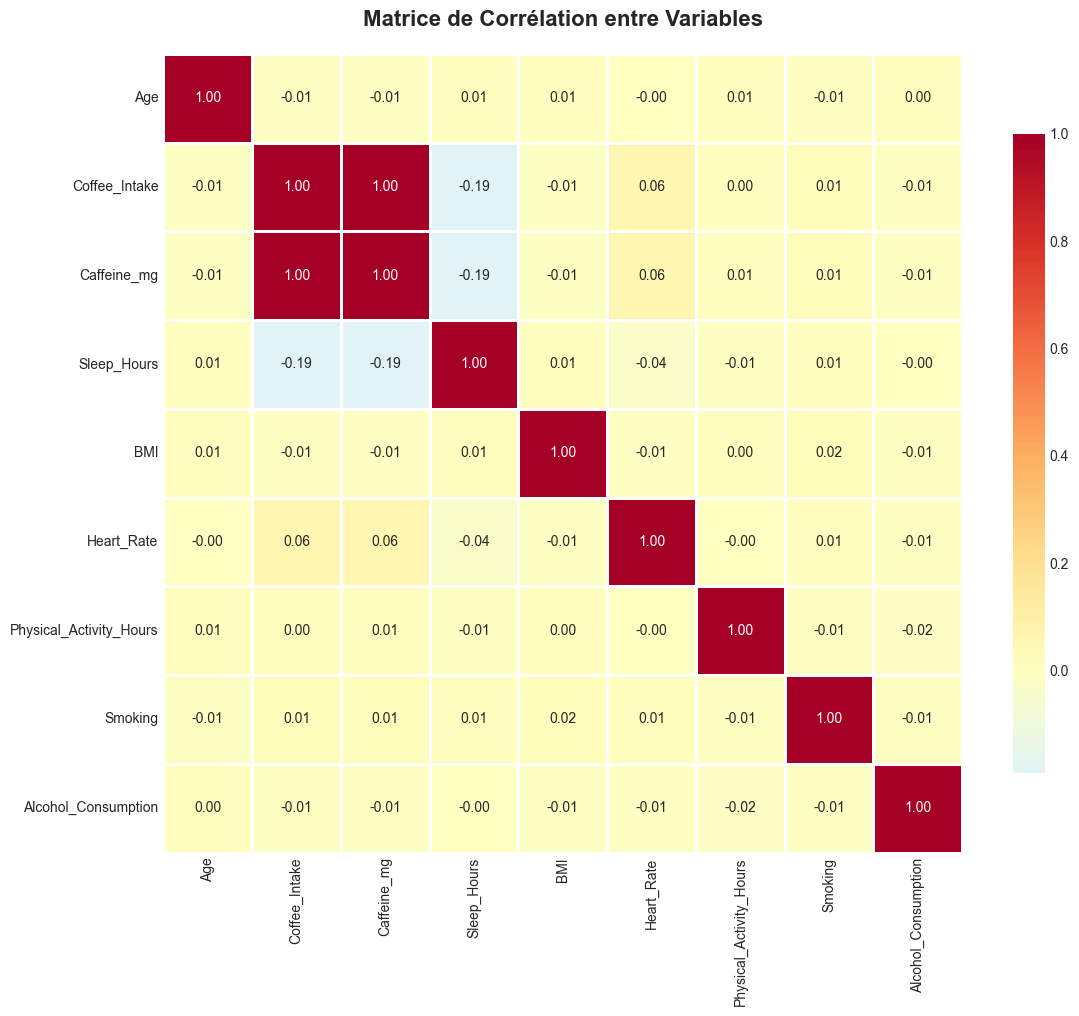

In [18]:

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlBu_r', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation entre Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

La matrice de corrélation montre que la plupart des variables du jeu de données sont faiblement corrélées entre elles. La seule relation notable est une corrélation négative modérée entre la consommation de café/caféine et les heures de sommeil (environ -0,19), ce qui suggère que plus la consommation de caféine est élevée, moins les individus dorment.

Pour les autres variables liées à la santé, comme le BMI ou le rythme cardiaque, aucune corrélation significative n’apparaît avec la consommation de café ou de sommeil. Cela indique que, dans cet échantillon, les comportements de consommation de café n’ont pas d’impact linéaire marqué sur les principaux indicateurs de santé mesurés.

Nous allons finaliser notre analyse par un récap avec des moyennes de catégories importantes.

In [16]:
print(f"   • Consommation moyenne de café: {df['Coffee_Intake'].mean():.2f} tasses/jour")
print(f"   • Caféine moyenne: {df['Caffeine_mg'].mean():.1f} mg")
print(f"   • Sommeil moyen: {df['Sleep_Hours'].mean():.2f} heures")
print(f"   • BMI moyen: {df['BMI'].mean():.2f}")
print(f"   • Âge moyen: {df['Age'].mean():.1f} ans")
print(f"   • Niveau de stress le plus fréquent: {df['Stress_Level'].mode()[0]}")

   • Consommation moyenne de café: 2.51 tasses/jour
   • Caféine moyenne: 238.4 mg
   • Sommeil moyen: 6.64 heures
   • BMI moyen: 23.99
   • Âge moyen: 34.9 ans
   • Niveau de stress le plus fréquent: Low
